## Final Project

data yang digunakan adalah data kaggle 'House Prices - Advanced Regression Techniques', memprediksi saleprice dari tiap Id.


import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


read dataframe

In [2]:
train = pd.read_csv('D:/python/Final project/dataset/train.csv')
test = pd.read_csv('D:/python/Final project/dataset/test.csv')

In [3]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]

explore dataframe

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.count()
test = pd.DataFrame(test)

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
test.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Train

In [11]:
pd.isnull(train).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

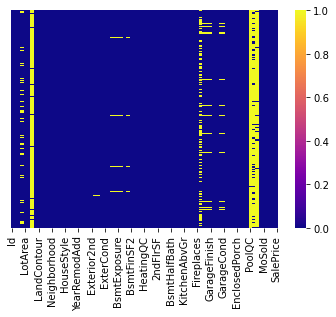

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='plasma')

<AxesSubplot:>

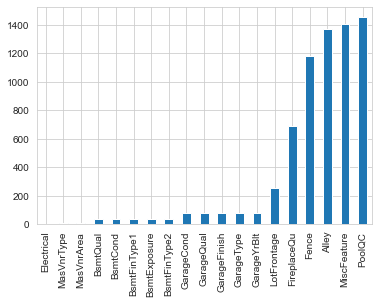

In [13]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

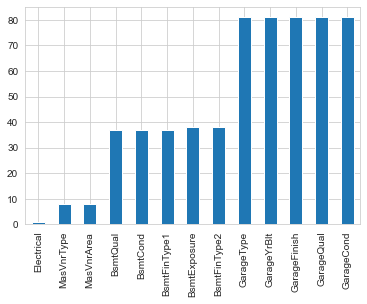

In [14]:
train.drop(columns=['FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', "Fence", 'LotFrontage'], inplace=True)

sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

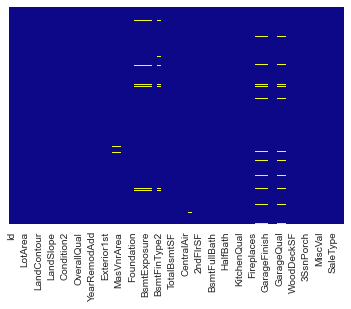

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [16]:
pd.isnull(test).sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

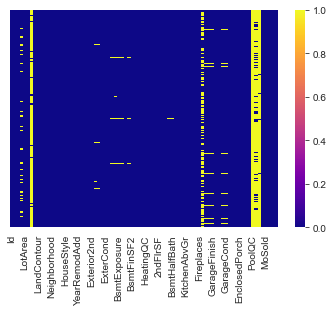

In [17]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='plasma')

<AxesSubplot:>

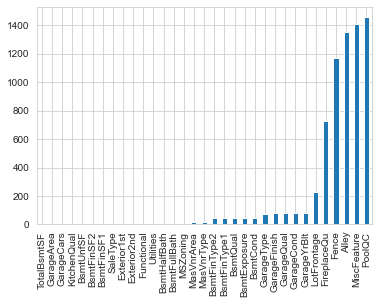

In [18]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [19]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

,Training,Testing
Id,0.0,0.0
MSSubClass,0.0,0.0
MSZoning,0.0,4.0
LotArea,0.0,0.0
Street,0.0,0.0
...,...,...
Alley,NaN,1352.0
FireplaceQu,NaN,730.0
PoolQC,NaN,1456.0
Fence,NaN,1169.0


In [20]:
meaning_null = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [21]:
for i in meaning_null:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)
    X[i].fillna("None", inplace=True)

In [22]:
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace=True)
X["GarageYrBlt"].fillna(X["GarageYrBlt"].mean(), inplace=True)

train["MasVnrArea"].fillna(train["MasVnrArea"].mean(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].mean(), inplace=True)
X["MasVnrArea"].fillna(X["MasVnrArea"].mean(), inplace=True)

train["MasVnrType"].fillna("None", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
X["MasVnrType"].fillna("None", inplace=True)

<AxesSubplot:>

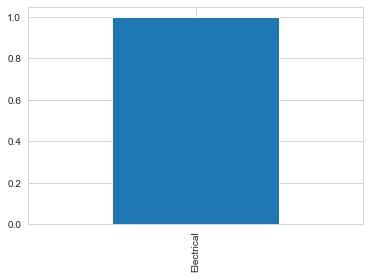

In [23]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

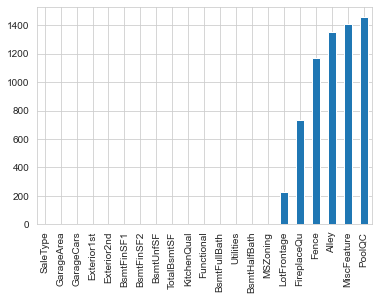

In [24]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [25]:
train_null_2 = pd.isnull(train).sum()
test_null_2 = pd.isnull(test).sum()

null_2 = pd.concat([train_null_2, test_null_2], axis=1, keys=["Training", "Testing"])

In [26]:
null_values_2 = null_2[(null_2.sum(axis=1) > 0)]
null_values_2

,Training,Testing
MSZoning,0.0,4.0
Utilities,0.0,2.0
Exterior1st,0.0,1.0
Exterior2nd,0.0,1.0
BsmtFinSF1,0.0,1.0
BsmtFinSF2,0.0,1.0
BsmtUnfSF,0.0,1.0
TotalBsmtSF,0.0,1.0
Electrical,1.0,0.0
BsmtFullBath,0.0,2.0


In [27]:
train = train.dropna()
print(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64


In [28]:
types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

In [29]:
numerical_values_test = list(num_test.index)

print(numerical_values_test)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [30]:
for i in numerical_values_test:
    test[i].fillna(test[i].mean(), inplace=True)

In [31]:
categorical_values_test = list(cat_test.index)
fill_cat = []

for i in categorical_values_test:
    if i in list(null.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [32]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)

most_common = []

for i in fill_cat:
    most_common.append(most_common_term(X[i]))
    
most_common

['RL',
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'Inside',
 'Gtl',
 'NAmes',
 'Norm',
 'Norm',
 '1Fam',
 '1Story',
 'Gable',
 'CompShg',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'PConc',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'GasA',
 'Ex',
 'Y',
 'SBrkr',
 'TA',
 'Typ',
 nan,
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'Y',
 nan,
 nan,
 nan,
 'WD',
 'Normal']

In [33]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Street': ['Pave'],
 'Alley': [nan],
 'LotShape': ['Reg'],
 'LandContour': ['Lvl'],
 'Utilities': ['AllPub'],
 'LotConfig': ['Inside'],
 'LandSlope': ['Gtl'],
 'Neighborhood': ['NAmes']}

In [34]:
k = 0
for i in fill_cat:  
    test[i].fillna(most_common[k], inplace=True)
    k += 1

In [35]:
training_null_3 = pd.isnull(train).sum()
testing_null_3 = pd.isnull(test).sum()

null_3 = pd.concat([training_null_3, testing_null_3], axis=1, keys=["Training", "Testing"])
null_3[null_3.sum(axis=1) > 0]

,Training,Testing
Alley,NaN,1352.0
FireplaceQu,NaN,730.0
PoolQC,NaN,1456.0
Fence,NaN,1169.0
MiscFeature,NaN,1408.0


In [36]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

print(train.shape)
print(test.shape)

(1459, 75)
(1459, 80)


In [37]:
y_train = train["SalePrice"].copy()
x_train = train.copy().drop(columns = ["Id", "SalePrice"])
x_test = test.copy().drop(columns = ["Id"])

print(x_train.shape)
print(x_test.shape)

(1459, 73)
(1459, 79)


In [38]:
num_cols = x_train.select_dtypes(include=['number'])
cat_cols = x_train.select_dtypes(include=['object'])


In [39]:
df = pd.concat([train, test])

In [40]:
categorical_cols = df.select_dtypes(include=np.object).columns
df = pd.get_dummies(df, prefix=categorical_cols)
df

C:\Users\ariq\AppData\Local\Temp/ipykernel_11044/966153420.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = df.select_dtypes(include=np.object).columns


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
0,1,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,3,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,0,0,0
1455,2916,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1457,2918,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,0,1,0,0,0,1


In [41]:
df = df.drop(columns = ["Id"])

In [42]:
print(df.shape)

(2918, 326)


In [43]:
categorical_cols = train.select_dtypes(include=np.object).columns
train = pd.get_dummies(train, prefix=categorical_cols)
train

C:\Users\ariq\AppData\Local\Temp/ipykernel_11044/267013382.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = train.select_dtypes(include=np.object).columns


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
y = train['SalePrice']

x = train.drop('SalePrice', axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.66


In [49]:
print(lr.intercept_)

-1159468.02606988


In [50]:
print(lr.coef_)

[ 1.05380127e+00  7.08695749e-01  6.67821132e+03  5.32543799e+03
  3.59787234e+02  1.56399605e+02  2.87297335e+01  1.87077600e+01
  9.27710419e+00 -8.91439929e-01  2.70934599e+01  1.18376299e+01
  3.79755736e+01 -2.52076841e+01  2.46054657e+01  1.52088103e+02
  1.31140430e+03  5.44051364e+03 -8.96148868e+01 -3.24227999e+03
 -8.99421378e+03  1.52081692e+03  3.45712457e+03  2.99149932e+01
  3.01073870e+03  1.68657916e+01  9.72910454e+00 -9.06257799e+00
 -5.19671434e+00  1.87474761e+01  2.45347808e+01  9.49143070e+01
 -4.38517867e-01 -8.45757224e+03 -1.49085777e+03 -2.03364639e+03
 -7.57423557e+03  1.68441449e+03  7.20043581e+03  1.74419866e+04
 -2.22257854e+04  9.54270119e+03  8.37133983e+03  1.58447108e+04
 -1.06899113e+04 -1.58149625e+04  9.20586835e+03 -1.00448588e+03
 -3.16817564e+04  1.64440751e+04  8.38834494e+03  6.85101746e+03
 -1.68110113e+00 -1.15383784e+04  1.15383784e+04 -2.11214063e+03
  4.94092415e+02  1.59552257e+03  2.25256452e+01 -6.42856871e+02
  7.54811606e+03 -9.90861

In [51]:
data = pd.DataFrame(lr.coef_, x.columns, columns = ['Coeff'])
data

,Coeff
Id,1.053801
LotArea,0.708696
OverallQual,6678.211319
OverallCond,5325.437990
YearBuilt,359.787234
...,...
SaleCondition_AdjLand,-188.497156
SaleCondition_Alloca,-4771.304420
SaleCondition_Family,-10867.135436
SaleCondition_Normal,-3576.385132


In [52]:
predictions_1 = lr.predict(X_test) 
print(predictions_1.shape)
predictions_1

(438,)


array([224808.36118532, 134397.34579089, 149048.75762494, 122131.86738632,
       115609.9693689 , 191311.01949921, 220537.68562459, 131241.71954623,
       193814.80942042, 140485.24069506, 208049.26045846, 210590.19415469,
       136188.17136908, 125684.73538008, 161733.10468592, 151557.8726994 ,
       120787.74968869, 137972.7095036 , 197965.64070505, 132156.45704269,
       309860.36719173,  80352.42295761, 232080.12318725, 311823.14369606,
       253915.13065418, 183791.38211242, 180506.38799687, 470033.95827163,
       110216.76880955,  93968.28853754, 309637.3531698 , 132561.55093152,
       134156.43183132, 192578.82199602, 109736.37530735,  86171.77511769,
        96283.58968755, 211598.60191018, 480592.23750114, 120293.01208743,
       149741.50113173, 164864.26306843, 115523.21085761, 879335.17312514,
       147087.82298204, 311555.16453707, 209610.49669347, 135205.66800294,
       224372.11512987,  90606.7223259 , 185171.22996106, 104484.70455858,
       214334.62825231, 1

In [53]:
predictions_2 = lr.predict(X_train)
print(predictions_2.shape)

(1021,)


In [54]:
prediction = np.concatenate((predictions_1, predictions_2))
print(prediction.shape)

(1459,)


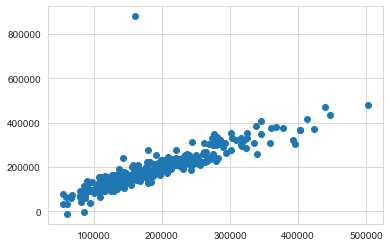

In [55]:
plt.scatter(y_test, predictions_1)

In [56]:
res=pd.DataFrame(columns = ["Id", "SalePrice"])
res["Id"] = test["Id"]
res["SalePrice"] = prediction

In [57]:
res

,Id,SalePrice
0,1461,224808.361185
1,1462,134397.345791
2,1463,149048.757625
3,1464,122131.867386
4,1465,115609.969369
...,...,...
1454,2915,150981.754086
1455,2916,98004.641081
1456,2917,127234.766394
1457,2918,188118.028821


In [58]:
res.to_csv("submission.csv",index=False)

linear regression menunjukan positive correlation yang menunjukan pengaruh terhadap Saleprice

In [59]:
pickle.dump(res, open("model_regression.pkl","wb"))